# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [58]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

import sys
if sys.version_info[0] < 3:
    print("Must be using Python 3")
# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)


# Success
#print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Must be using Python 3


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


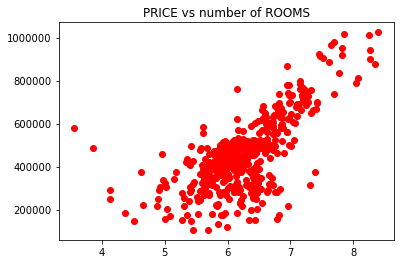

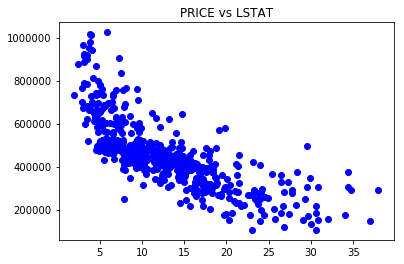

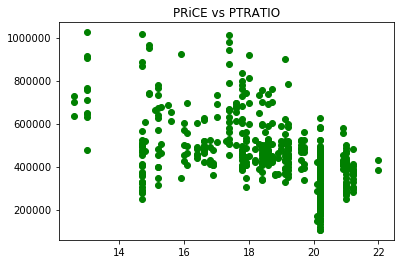

Statistics for Boston housing dataset:

Minimum rooms: 3.56
Maximum rooms: 8.40
Mean number of rooms: 6.24
Median number of rooms 6.18
Standard deviation of number of rooms: 0.64


In [69]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)

mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

plt.plot(features['RM'], prices, 'ro')
plt.title('PRICE vs number of ROOMS')
plt.show()


plt.plot(features['LSTAT'], prices, 'bo')
plt.title('PRICE vs LSTAT')
plt.show()


plt.plot(features['PTRATIO'], prices, 'go')
plt.title('PRiCE vs PTRATIO')
plt.show()

minimum_room = np.min(features['RM'])
maximum_room = np.max(features['RM'])
mean_room = np.mean(features['RM'])
median_room = np.median(features['RM'])
std_room = np.std(features['RM'])

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum rooms: {:,.2f}".format(minimum_room)
print "Maximum rooms: {:,.2f}".format(maximum_room)
print "Mean number of rooms: {:,.2f}".format(mean_room)
print "Median number of rooms {:,.2f}".format(median_room)
print "Standard deviation of number of rooms: {:,.2f}".format(std_room)

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: ** 

- If RM increases i.e. if avg number of rooms increases, MEDV increases. Price for RM value of 7 should be greater in comparision to RM value of 6. As observed in data exploration as the number of rooms increases the house price increases. In general if we go out in the market, houses with more number of rooms would be more expensive in comparision to houses with lesser number of rooms. Studio apartments in a neighborhood are going to be cheaper than 2 bedroom apartments in the same neighborhood.

- Lstat 15 would be more than lstat 20. lstat is the percentage od lower class workers living in the neighborhood. Neighborhoods with lower lstat percentage will have higher MEDV price in comparision to the higher lstat percentage. And so, neighborhood with lstat percent of 15 will be worth more than a neighborhood that has lstat value of 20. In real life, larger percent of low income families would  mean, that standard of living in that neighborhood would be lower. The crime rate might be higher in such places, just because those people might not be getting the right facilities. The area might be a little dirtier and so on.

- PTRATIO value 10 will have more value than PTRATIO 15. PTRATIO is the ration of students to teacher in priary and secondary schools in neighborhood. The lesser the number of students are with every teacher in a school the more attention they, get. And hence PTRATIO 10 is better than 15. If there is a larger ration of students with every teacher, the students might get lesser attention from them and hence their learning graph might get impacted.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [46]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

R^2 value of 0.923 signifies that 92.3% of the target variable can be predicted from the features given in the dataset and the model trained above. 

Looking at the number, it looks like a good preditcion even though, it is very hard to say without looking at the way the data was trained and the data set. It might be so that this prediction was made with just basic cleaning and a lot more can be done or it may be a over fit as well.

R^2 cofficient of determination helps us compare our predicted value with the most naive model that can be made. i.e. if we just take the mean of the target variable and make a model which predicts the average value always, and compare it with a model that we trained and compare the residual sum of square (Summation of(target value- predicted value)^2) with the the total sum of squares error we will be able to understand how better or worse we have done in building a model.

When we are comparing our results with something, we need a base model, and in R^2, we take that as a model which always predicts the average value of target variable.

So, in this example of predicting houses R^2 is comparing our predicted results with the error given by our naive model. A positive value of 0.92 means that we are able to much better than our naive model and our model is capable of explaining 92.3% of variance amongst various housing prices. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [41]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = (None, None, None, None)
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

(98, 3)
Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

The benefit of splitting the data into testing data and training data is, so that we can avoid over fitting of the data. If we train our model on the entire dataset without keeping the test data aside, we will end up training our model on the entire dataset and hence the test score that we get at the end of the test would not be a true picture of our model as the model had already seen this data before when we had trained our model.


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

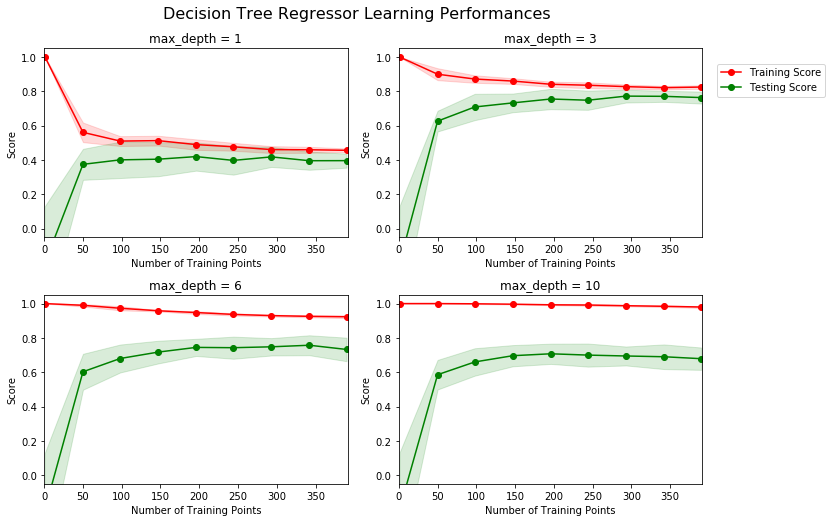

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

i> For the second graph the maximum depth for the model is 3
ii> As more training points are added the score starts dereasing and then gradually it starts becoming constant. As for the testing curve the score starts increasing in the beginning and then gradually it becomes contsant and parallel to the training curve.
iii> Having more data points wouldnt have helped really, as the score gradually levels out after the 150th data point. So, having more data points wouldnt have made any difference.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

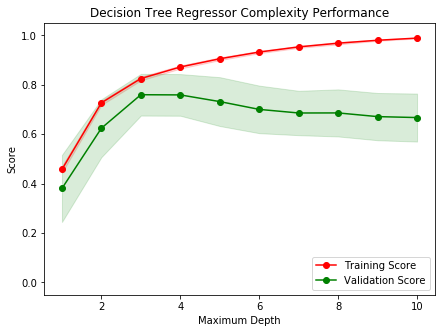

In [6]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

i> When the model is trained with a maximum depth of 1, the model suffers from high bias as the score is really low and the values are not being predicted correctly and hence under fitting is observed in the dataset.

ii> When the model is trained with maximum depth of 10, High Variance is observed, as the training score was really high, which signalled towards a overfitting case, whereas the validation score was low, confirming that overfitting had occured while training the model.


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The model with max depth 3 gives us the best predicted results. As seen in the Decision tree regressor complexity performance graph, in the beginning with depth =1 a high bias was observed where,even though the validation score and the training score are comparable but the score was pretty low, which leads me to  think that underfitting was observed while training the data. A more complex model could have been used. As the max depth increases bias keeps reducing and the variance remains small till depth = 3. After max depth =3, even though the bias is decreasing the variance starts increasing. As the gap between the training score and the validation score starts increasing. And so, the model is not generalising well to the new data after this. Even though the training score is improving the test score is decreasing which implies overfitting is starting to happen

Therefore, Max depth =3 model is the one that generalises best to the unseen data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Correction: Grid search is used to get the values of our hyper paramters which will then help us learn our paramters within our estimators. Hyper paramters are the parameters which are set to some fixed values before we train our model to get the paramter values which define our model.Using gird search we can figure out these hyper parameters which then can be set as fixed values to get the optimal parameter values for our model. For eg: In case of Neural model, we neeed to know the number of layers in our model, the number of neurons in each layer, the learning rate etc. These are the hyper parameters of our model which will help us figure our the weight of each edge which actually defines our training data.

Grid search technique is where we do a cross product product on all possible values of the different variant hyperparamters of our model. We just run loops over all the values of all the values of different hyper parameters and observe the performane of the model. This technique lets us find the best model paramters which will help us find the best predicted values. "Grid" in the Grid search technique is typically a grid where u can see it as a list of features both on coulmns and rows, and each cell represent one set of features with specific values of each hyoer paramters. This grid gives us exhaustive model prediction score based on different values of different paramters.

It can help in optimizing a learning algorithm by helping us find the optimal values of our model paramters.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

Correction: Thanks for pointing out! Yes, we keep one set for validation and not for testing. I have crrected the same. Testing will be performed on the test data set that was kept aside even before the cross validation technique comes into the picture!

k-fold cross validation technique is where we split our dataset into k small subsets. After spliting our datasets into k sets, we train our models on k-1 splits, keeping one set for validation. We repeat this process for k times, treating each subset as a validation set once and training our model on the rest of the subsets. 

This technique lets us train our model on a bigger data set and the final model that we get is te avergae of all the models thus trained.

Benefit of k fold cross validation is - that we dont train our model on our test dataset + we get to take the benefit of all the data points by taking an average of the model trained of all the dataset.

-In grid search with one batch of paramters we train our model and test it on test data set
-Repeat it again for all different sets of parameters and test it on the same data set again
- This can lead to overfitting as we are testing on the test data set again and again to find the best values for our paramaters.

- with k fold cross validation coming into the picture we can train our model on k-1 data set and test it on kth set, take the average model and keep
- repeat this again for our next set of values for our paramter and then keep the average model again
- then finally after we get the best model with the least error we can test it our test dataset.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [44]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    #cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

The scikit-learn version is 0.18.1.


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [35]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 3 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

Parameter 'max_depth' is 3 for the optimal model. It matches the result that we got in Question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [36]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $362,421.82
Predicted selling price for Client 2's home: $245,296.15
Predicted selling price for Client 3's home: $903,700.00


**Answer: **

DOUBT: Thanks for the feedback! But, how does comparing the feature values to the average house feature value or the quartile in which the house exists help me visualise if my predictions are correct? I looked at the graphs, i.e price vs each individual features which i have updated in the data exploration step as well. But, I couldnt understand how i could present it statistically in numbers. 

Looking at the graphs in the data exploration step as well, when we look at the graph price bs number of rooms, as the number of rooms increase, the price gradually increases. Looking at the graph, our client 3 seems to be correctly predicted with house price between 800000 to 1000000. Similarly if we look at the Price vs LSTAT graph, we see as the LSTAT decreases the house price drcreases.For client 3, lstat placed at 3% and prediction 903,700 seems to be rightly placed between 800,000 to 1000,000. The price vs PTRATIO graph is a little more scattered than the other two, but if looked at closely, it also seem to be following a patterm where the right side of the graphs is more dense from mid to bottom whicle left side of the graph is more dense on the upper side than on the bottom side.And hence our client 3 with lowest ptratio placing just 12 students to 1 teacher should be taken as a good feature leading to a price increase for the house

The prices predicted for this client data seems valid. As expected logically as well as through the data exploratin step we did at the beginning of this project, we observed that as the number of rooms increase in our house, the price of the house increases. As the poverty level in the neighbor hood increases the price of the house decreases. As the lstat decreases the price of the house increases. As for the student teacher ratio, as the student teacher ratio gets better i.e the smaller the number of students there are with each teacher the better the school quality is, and hence the house proce increases. 

Predicted selling price for Client 1's home: $362,421.82

Predicted selling price for Client 2's home: $245,296.15

Predicted selling price for Client 3's home: $903,700.00


As expected the third house should have the highest price as it has largest number of rooms(8 in comparision of 5 and 4 for other two houses), lowest lstat percentage(2 in comparision to 32 and 17 for the other two houses) and the best student teacher ratio(12 students for 1 teacher in comparision to 17 and 32 for the other two houses.)


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [37]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

I dont think the constructed model can be used for predicting the house prices in the real world setting.

i> The data that was collected in 1978 does give us a glimpse of how prices can reflect the prices of the houses in Boston. But, a lot of changed since then. A lot of factors change, the houses would have gotten older with lacking facilities. There a lot of other factors that matter, for eg: good schools, commute to work places, public transport and many more. If all those factors have gone down since 1978, the data might not reflect the real picture.

ii> The features present in the current data is not enough to describe a home. As discussed above there are so many other features that people think of before investing into a house. Quality of appliances, square feet of the area, pool, quality of school, public transport accessibilty etc are some of the many other features that should be taken into consideration.

iii> The model is not robust enough to make consistent predictions as the prediction given by the models trained on different sets of data keeps changing. Suggesting that either some underfitting or overfitting is happening because of which the model is not able to predict consistent value for our client data.

iv> Data collected in urban city like Boston would not be applicable in a rural city. The likes and dislikes of people looking for houses in urban and rural city would be different from each other.

v> The price of individual house might be higher or lower due to its individual features but, the neighborhood effects the price of houses a lot. So, price of the individual home will be based on the characteristics if the entire neighborhood as well.

0> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.